# Hacker Earth - Adopt a Buddy

[mudgalabhay](https://github.com/mudgalabhay)

## Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Datasets

In [4]:
url_train = "https://raw.githubusercontent.com/mudgalabhay/HackerEarth-Machine-Learning-challenge-Adopt-a-buddy/master/Dataset/train.csv"
url_test = "https://raw.githubusercontent.com/mudgalabhay/HackerEarth-Machine-Learning-challenge-Adopt-a-buddy/master/Dataset/test.csv"

df_train = pd.read_csv(url_train)
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [6]:
df_train.shape

(18834, 11)

In [7]:
# Checking null values
df_train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [9]:
df_test = pd.read_csv(url_test)
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [10]:
df_test.shape

(8072, 9)

In [11]:
df_test.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2'],
      dtype='object')

In [12]:
df_test.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [15]:
print("Train data")
print(df_train.isnull().sum())
print('\n')
print("Test data")
print(df_test.isnull().sum())

Train data
pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64


Test data
pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64


We could see that the train data has 1477 values missing and test data 619 so it can be filled or removed. In this case it would be filled with mean

In [16]:
mean_train_condition = df_train['condition'].mean()

print("Mean of condition feature in train", mean_train_condition)

mean_test_condition = df_test['condition'].mean()

print("Mean of condition feature in test", mean_test_condition)

# replace null values with mean value
df_train['condition'].replace(np.nan, mean_train_condition, inplace=True)
df_test['condition'].replace(np.nan, mean_test_condition, inplace=True)

Mean of condition feature in train 0.8833899867488622
Mean of condition feature in test 0.8866228364417014


In [17]:
df_train.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [18]:
print("Train data")
print(df_train.isnull().sum())
print('\n')
print("Test data")
print(df_test.isnull().sum())

Train data
pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64


Test data
pet_id          0
issue_date      0
listing_date    0
condition       0
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64


There is no more missing value right now

## Correlation Matrix

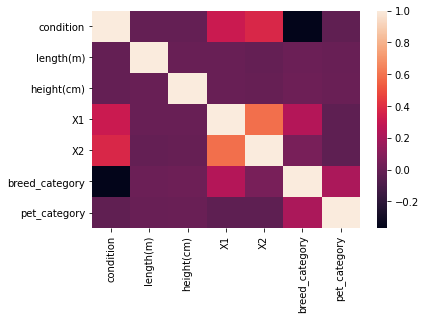

In [19]:
# Keeping columns that has more than 1 unique value

df_train = df_train[[col for col in df_train if df_train[col].nunique() > 1]]

df_corr = df_train.corr()

# Visualizng the correlation matrix
sns.heatmap(df_corr)

plt.show()

In [20]:
# Finding categorical features
num_cols = df_train._get_numeric_data().columns

categorical_cols = list(set(df_train.columns) - set(num_cols))

categorical_cols

['color_type', 'listing_date', 'pet_id', 'issue_date']

# Feature Mapping - Color Type

In [21]:
df_train['color_type'].value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Orange                 39
Brown Merle            39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [23]:
animals = {
    "Black" : 1,
    "White" : 2,
    "Brown" : 3,
    "Brown Tabby" : 4,
    "Tan" : 5,
    "Blue" : 6,
    "Orange Tabby" : 7,
    "Red" : 8,
    "Brown Brindle" : 9,
    "Tricolor" : 10,
    "Blue Tabby" : 11,
    "Tortie" : 12,
    "Calico" : 13,
    "Gray" : 14,
    "Chocolate" : 15,
    "Torbie" : 16,
    "Cream Tabby" : 17,
    "Sable" : 18,
    "Cream" : 19,
    "Fawn" : 20,
    "Yellow" : 21,
    "Buff" : 22,
    "Lynx Point" : 23,
    "Blue Merle" : 24,
    "Seal Point" : 25,
    "Black Brindle" : 26,
    "Gray Tabby" : 27,
    "Black Tabby" : 28,
    "Flame Point" : 29,
    "Orange" : 30,
    "Brown Merle" : 31,
    "Black Smoke" : 32,
    "Gold" : 33,
    "Tortie Point" : 34,
    "Silver" : 35,
    "Red Tick" : 36,
    "Blue Tick" : 37,
    "Blue Point" : 38,
    "Lilac Point" : 39,
    "Silver Tabby" : 40,
    "Yellow Brindle" : 41,
    "Red Merle" : 42,
    "Apricot" : 43,
    "Calico Point" : 44,
    "Blue Cream" : 45,
    "Blue Tiger" : 46,
    "Chocolate Point" : 47,
    "Green" : 48,
    "Pink" : 49,
    "Blue Smoke" : 50,
    "Brown Tiger" : 51,
    "Agouti" : 52,
    "Silver Lynx Point" : 53,
    "Liver" : 54,
    "Liver Tick" : 55,
    "Black Tiger" : 56
}

df_train['color_type'] = df_train['color_type'].map(animals)
df_test['color_type'] = df_test['color_type'].map(animals)

In [24]:
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.00000,4,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.00000,2,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,0.88339,3,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.00000,2,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.00000,1,0.50,11.06,18,4,0.0,1


In [25]:
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,1,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,7,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,1,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,1,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,3,0.71,30.92,0,7


In [33]:
df_train['listing_date'] = df_train['listing_date'].astype('datetime64[ns]')
df_train['issue_date'] = df_train['issue_date'].astype('datetime64[ns]')
df_test['listing_date'] = df_test['listing_date'].astype('datetime64[ns]')
df_test['issue_date'] = df_test['issue_date'].astype('datetime64[ns]')

In [34]:
df_train.dtypes

pet_id                    object
issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                float64
color_type                 int64
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category           float64
pet_category               int64
dtype: object

In [35]:
df_test.dtypes

pet_id                  object
issue_date      datetime64[ns]
listing_date    datetime64[ns]
condition              float64
color_type               int64
length(m)              float64
height(cm)             float64
X1                       int64
X2                       int64
dtype: object

In [36]:
df_train['noofdays'] = (df_train['listing_date'] - df_train['issue_date']).astype('timedelta64[h]')
df_test['noofdays'] = (df_test['listing_date'] - df_test['issue_date']).astype('timedelta64[h]')

In [37]:
df_train['area'] = df_train['length(m)'] * (df_train['height(cm)']*100)
df_test['area'] = df_test['length(m)'] * (df_test['height(cm)']*100)

In [38]:
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,noofdays,area
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.00000,4,0.80,7.78,13,9,0.0,1,1768.0,622.40
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.00000,2,0.72,14.19,13,9,0.0,2,44705.0,1021.68
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,0.88339,3,0.15,40.90,15,4,2.0,4,18056.0,613.50
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.00000,2,0.62,17.82,0,1,0.0,2,18138.0,1104.84
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.00000,1,0.50,11.06,18,4,0.0,1,1257.0,553.00


In [39]:
df_test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,noofdays,area
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,1,0.87,42.73,0,7,105711.0,3717.51
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,7,0.06,6.71,0,1,4193.0,40.26
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,1,0.24,41.21,0,7,47992.0,989.04
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,1,0.29,8.46,7,1,27559.0,245.34
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,3,0.71,30.92,0,7,11125.0,2195.32


## Modeling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
cols_to_norm = ['noofdays', 'area', 'height(cm)']

df_train[cols_to_norm] = MinMaxScaler().fit_transform(df_train[cols_to_norm])

In [42]:
df_train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,noofdays,area
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.00000,4,0.80,0.061778,13,9,0.0,1,0.018318,0.125030
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.00000,2,0.72,0.204222,13,9,0.0,2,0.238320,0.205239
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,0.88339,3,0.15,0.797778,15,4,2.0,4,0.101775,0.123242
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.00000,2,0.62,0.284889,0,1,0.0,2,0.102195,0.221945
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.00000,1,0.50,0.134667,18,4,0.0,1,0.015699,0.111089


In [43]:
df_test[cols_to_norm] = MinMaxScaler().fit_transform(df_test[cols_to_norm])

In [44]:
df_train.columns

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category', 'pet_category',
       'noofdays', 'area'],
      dtype='object')

In [45]:
X_train = df_train[['condition', 'color_type', 'length(m)', 'height(cm)', 
                    'X1', 'X2', 'noofdays', 'area']]

y_train = df_train['pet_category']

In [46]:
X_test = df_test[['condition', 'color_type', 'length(m)', 'height(cm)', 
                    'X1', 'X2', 'noofdays', 'area']]

In [47]:
X_test.head()

,condition,color_type,length(m),height(cm),X1,X2,noofdays,area
0,0.0,1,0.87,0.838595,0,7,0.480012,0.746938
1,1.0,7,0.06,0.037795,0,1,0.016897,0.008089
2,1.0,1,0.24,0.804802,0,7,0.216704,0.198722
3,1.0,1,0.29,0.076701,7,1,0.123491,0.049295
4,1.0,3,0.71,0.576034,0,7,0.048520,0.441093


## Build Model

In [48]:
from sklearn.metrics import accuracy_score

### Model 1 : Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [51]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
print("Train score:", model1.score(X_train, y_train))

Train score: 0.8072634597005416


In [53]:
m1_predict = model1.predict(X_test)

In [54]:
print("Test score:", model1.score(X_test, m1_predict))

Test score: 1.0


In [55]:
y_train_b = df_train['breed_category']

In [56]:
model1.fit(X_train, y_train_b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
print("Train score:", model1.score(X_train, y_train_b))

Train score: 0.9013486248274397


In [58]:
m1_predict_breed = model1.predict(X_test)

In [59]:
print("Test score:", model1.score(X_test, m1_predict_breed))

Test score: 1.0


## Model function

In [93]:
def cat_predict(model):
    print("Prediction for color")
    model.fit(X_train, y_train)
    print("Train score:", model.score(X_train, y_train))
    
    model_predict = model.predict(X_test)
    print("Test score:", model.score(X_test, model_predict))
    return model_predict
    
def breed_predict(model):
    print("Prediction for breed")
    model.fit(X_train, y_train_b)
    print("Train score:", model.score(X_train, y_train_b))
    
    model_predict = model.predict(X_test)
    print("Test score:", model.score(X_test, model_predict))
    return model_predict

### Model 2 : Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model2 = RandomForestClassifier(n_estimators=100, criterion='gini')

In [68]:
cat_predict(model2)

Prediction for color
Train score: 0.9999469045343528
Test score: 1.0


In [69]:
breed_predict(model2)

Prediction for breed
Train score: 1.0
Test score: 1.0


### Model 3 : Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
model3 = GradientBoostingClassifier(random_state=42)

In [72]:
cat_predict(model3)

Prediction for color
Train score: 0.9064988849952214
Test score: 1.0


In [73]:
breed_predict(model3)

Prediction for breed
Train score: 0.9186577466284379
Test score: 1.0


### Model 4 : Voting Classifier

In [74]:
from sklearn.ensemble import VotingClassifier

In [75]:
model4 = VotingClassifier(estimators=[('rf', model2), ('gb', model3)], voting='hard')

In [76]:
cat_predict(model4)

Prediction for color
Train score: 0.9629393649782308
Test score: 1.0


In [77]:
breed_predict(model4)

Prediction for breed
Train score: 0.9415949877880428
Test score: 1.0


### Model 5 : Hist Gradient Boosting Classifier

In [78]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [79]:
model5 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.241, max_leaf_nodes=55,
                                        l2_regularization=1.222, validation_fraction=0.1)

In [80]:
cat_predict(model5)

Prediction for color
Train score: 0.9936285441223319
Test score: 1.0


In [81]:
breed_predict(model5)

Prediction for breed
Train score: 0.9998407136030583
Test score: 1.0


### Model 6 : Voting Classifier (Hist + RF)

In [82]:
model6 = VotingClassifier(estimators=[('hgb', model5), ('rf', model2)], voting='hard')

In [83]:
cat_predict(model6)

Prediction for color
Train score: 0.9991504725496443
Test score: 1.0


In [84]:
breed_predict(model6)

Prediction for breed
Train score: 0.9998407136030583
Test score: 1.0


### Model 7 : Extra Tree Classifier

In [85]:
from sklearn.ensemble import ExtraTreesClassifier

In [86]:
model7 = ExtraTreesClassifier(n_estimators=100)

In [87]:
cat_predict(model7)

Prediction for color
Train score: 1.0
Test score: 1.0


In [88]:
breed_predict(model7)

Prediction for breed
Train score: 1.0
Test score: 1.0


### Model 8 : Voting Classifier (Hist + Extra + RF)

In [90]:
model8 = VotingClassifier(estimators=[('hgb', model5), ('et', model7), ('rf', model2)], voting='soft')

In [94]:
m8_predictions_category = cat_predict(model8)

Prediction for color
Train score: 1.0
Test score: 1.0


In [95]:
m8_predictions_breed = breed_predict(model8)

Prediction for breed
Train score: 1.0
Test score: 1.0


## Submissions

In [96]:
submission = pd.DataFrame({"pet_id":df_test['pet_id'], "breed_category": m8_predictions_breed, "pet_category": m8_predictions_category})

In [97]:
submission

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2
...,...,...,...
8067,ANSL_66809,1.0,2
8068,ANSL_59041,1.0,2
8069,ANSL_60034,1.0,2
8070,ANSL_58066,2.0,4


In [98]:
submission.to_csv("submission.csv", index=False)

In [99]:
s  = pd.read_csv("submission.csv")

In [100]:
s.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2
